In [6]:
import os
os.getcwd()

'/home/ptruong/git/lifeAndDeath/scripts'

In [17]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd


from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


from preprocessor import *
from stats import *
from plotting import *

# change work dir to data folder after importing relevant modules.
os.chdir('/home/ptruong/git/lifeAndDeath/data')

In [18]:
    filename = "proteinGroups tryptic.txt"
    data = create_full_data(data_file = filename, treshold = 1)

    data = data.fillna(0) # Input missing values to zero
    data = normalize(data)
    data_values, target_drugs, cell_lines, states, replicates = split_data(data)
    data_vals = data.T # create a data value df
    data = data.T
    data['target_drug'] = target_drugs
    data['cell_line'] = cell_lines
    data['states'] = states
    data['replicates'] = replicates
    data["marker"] = data["cell_line"]+"_"+data["states"]
    target_drug_map = convert_treatmentN_to_treatmentStr(data)
    data["treatment"] = data.replace({"target_drug": target_drug_map}).target_drug


/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (726,727) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [19]:
data

,A0A0D9SFH9;A0A1B0GW34;A0A1B0GV71;A0A0A0MRC7;A0A1B0GWD3;A0A024QZB8;Q13286-4;Q13286-2;Q13286-7;Q13286-3;Q13286;O95090;H3BQ48;A0A1B0GV41;Q13286-6;H3BR00;Q9UBD8;O95086;Q2TA70;B4DFF3;Q13286-5;A0A1B0GWH8;H3BPL0;A0A0D9SF04;Q9UBH5;Q9UP10;A0A1B0GUX3;H3BR84;H3BMN4;F6TI76;B4DMY6;H3BNK7;A0A1B0GUU4,A0A024QZX5;A0A087X1N8;P35237,A0A024R0T9;K7ER74;P02655;Q6P163,A0A024R161;Q9H1X3-3,A0A024R216;Q9Y3E1;H3BPM9;H3BPQ6,A0A024R2X5;Q9Y6F1;Q9Y6F1-2;C9J9C7,A0A024R412;A0A024R3W6;Q7LBX6;X5D2Q8;O60462-4;O60462-5;O60462-2;O60462-3;O60462;O60462-6;C9JH98,A0A024R4E5;H0Y394;H7C0A4;H7C2D1;H7BZC3;C9J5E5;C9JIZ1;C9JZI8;C9JHZ8;C9JES8;C9JHS7;C9JT62;C9JK79;C9JBS3;C9JEJ8;C9JHN6;C9JQ82;C9JMQ6;C9JHS9;C9J739;H7C3D0,A0A087WZA9;A0A024R4K9;A0A087X266;Q9BXJ8-2;Q9BXJ8,A0A024R4M0;P46781;B5MCT8;C9JM19;F2Z3C0;A8MXK4,...,X6R3G6;H0YKS8,X6R3N0;Q5K4L6;Q5K4L6-2;Q5K4L6-3;H7BZH4;H0YDM5;H0YDP0,X6RAL5;O00422;H7BZW6;U3KQ12;U3KPY7,X6RB39,target_drug,cell_line,states,replicates,marker,treatment
Reporter intensity corrected 0 A549_D_Rep1,-0.136931,0.172711,-0.180681,-0.180681,-0.032039,-0.180681,-0.066905,1.487712,-0.180681,0.313522,...,-0.180681,-0.180681,0.264803,-0.180681,0,A549,D,Rep1,A549_D,Control
Reporter intensity corrected 1 A549_D_Rep1,-0.205411,0.448214,-0.298873,-0.298873,-0.100126,-0.298873,-0.149248,2.089046,-0.298873,0.792233,...,-0.298873,-0.298873,0.694553,-0.298873,1,A549,D,Rep1,A549_D,8-zaguanine
Reporter intensity corrected 2 A549_D_Rep1,-0.262994,0.784326,-0.365465,-0.365465,-0.093429,-0.365465,-0.219178,2.797368,-0.365465,0.983546,...,-0.365465,-0.365465,0.777553,-0.365465,2,A549,D,Rep1,A549_D,Raltitrexed
Reporter intensity corrected 3 A549_D_Rep1,-0.183195,0.429159,-0.273035,-0.273035,-0.074252,-0.273035,-0.108002,2.271178,-0.273035,0.675689,...,-0.273035,-0.273035,0.426954,-0.273035,3,A549,D,Rep1,A549_D,Topotecan
Reporter intensity corrected 4 A549_D_Rep1,-0.182467,0.362103,-0.261418,-0.261418,-0.069400,-0.261418,-0.102870,1.952033,-0.261418,0.444786,...,-0.261418,-0.261418,0.406647,-0.261418,4,A549,D,Rep1,A549_D,Floxuridine
Reporter intensity corrected 5 A549_D_Rep1,-0.223749,0.909874,-0.354370,-0.354370,-0.039601,-0.354370,-0.107059,4.024195,-0.354370,0.703859,...,-0.354370,-0.354370,0.497758,-0.354370,5,A549,D,Rep1,A549_D,Nutlin
Reporter intensity corrected 6 A549_D_Rep1,-0.232850,0.869207,-0.378574,-0.378574,-0.125632,-0.378574,-0.111473,4.011381,-0.378574,0.861842,...,-0.378574,-0.378574,0.594015,-0.378574,6,A549,D,Rep1,A549_D,Dasatinib
Reporter intensity corrected 7 A549_D_Rep1,-0.222729,0.591464,-0.336379,-0.336379,-0.090210,-0.336379,-0.134737,3.451386,-0.336379,0.788439,...,-0.336379,-0.336379,0.654935,-0.336379,7,A549,D,Rep1,A549_D,Gefitinib
Reporter intensity corrected 8 A549_D_Rep1,-0.246194,0.679444,-0.355233,-0.355233,-0.116053,-0.355233,-0.091870,2.275264,-0.355233,0.857122,...,-0.355233,-0.355233,0.575402,-0.355233,8,A549,D,Rep1,A549_D,Vincristine
Reporter intensity corrected 9 A549_D_Rep1,-0.240437,0.205802,-0.372732,-0.372732,-0.232173,-0.372732,-0.165321,4.678744,-0.372732,0.763524,...,-0.372732,-0.372732,0.732383,-0.372732,9,A549,D,Rep1,A549_D,Bortezomib


## treatment

**0 - TMT marking Control**

**1 - 8-zaguanine**

kills cells having active hypoxanthine-guanine phosphoribosyl (HGPRTase), an enzyme essential for the salvage pathway. 

**2 - Raltitrexed**

Antimetabolite drug used in cancer chemotherapy. It is an inhibitor of thymidylate synthase (Enzyme inhibitor). Raltitrexed is chemically similar to folic acid and is in the class of chemotherapy drugs called folate antimetabolites, which inhibit one or more of three enzymes that use folate and derivatives as substrates: DHFR, GARFT and thymidylate synthase.

**3 - Topotecan**

Chemotherapeutic agent that is topoisomerase inhibitor. It is used to treaat ovarian cancer, lung cancer and other cancer types. (Enzyme inhibtor)

**4 - Floxuridine**

An oncology drug that belongs to the class known as antimetabolites. It is often used to treat colorectal cancer. 

**5 - Nutlin**

Cis-imidazoline analogs which inhibit the interaction between mdm2 and tumor supressor p53. 

**6 - Dasatinib**

Used as a targeted therapy to treat certain cases of chronic myelogenous leukemia and acute lumphoblastic leukemia. 

**7 - Gefitinib**

Drug used for certain breast, lung and other cancers. It is an epidermal growth factor  recepter (EGFR) inhibitor. 

**8 - Vincristine**

Vincristine works partly by binding to the tubulin protein, stopping the tubulin dimers from polymerizing to form microtubules, causing the cell to be unable to separate its chromosomes during the metaphase.

**9 - Bortezomib**

The boron atom in bortezomib binds the catalytic site of the 26S proteasome with high affinity and specificity. In normal cells, the proteasome regulates protein expression and function by degradation of ubiquitylated proteins, and also rids the cell of abnormal or misfolded proteins.


## state

**S** - Surviving

**D** - Dead

## cell_lines

**A549** - Adenocarcinomic human alveolar basal epithelial cells.

**RKO** - Colorectal cancer cells.

**MCF-7** - Breast cancer cells.
    

# PCA plot of the whole data set


In [20]:
np.random.seed(42)
rndperm = np.random.permutation(data.shape[0])
data_vals = data_vals.reset_index().drop("index", axis = 1)
data = data.reset_index().drop("index", axis = 1)


pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_vals)
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
data['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.33340555 0.22626289 0.14665547]


In [21]:
print("Variance explained by PC:s " + str(np.sum(pca.explained_variance_ratio_)))

Variance explained by PC:s 0.7063239148082923


## PC1 vs PC2

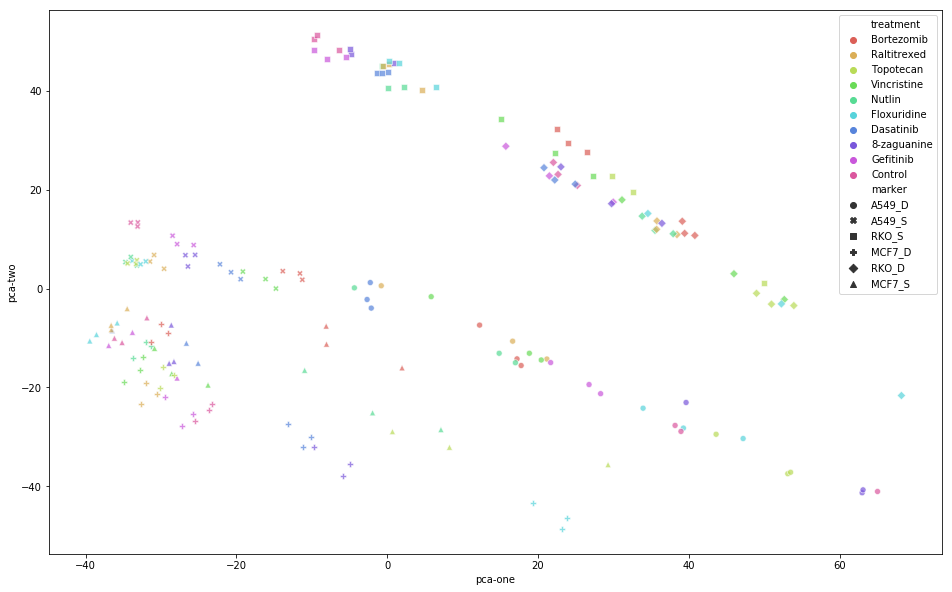

In [22]:
# PCA plot 2D
plt.figure(figsize=(16,10))
#markers = {'A549':"s", 'MCF7':"X", 'RKO':"o"}
ax = sns.scatterplot(x="pca-one", y="pca-two", 
                     style="marker",
                     hue = "treatment",
                     palette=sns.color_palette("hls", len(np.unique(data.target_drug))),
                     legend="full",
                     alpha=0.7,
                     #markers=markers,
                     data=data.loc[rndperm,:])

## PC1 vs PC3

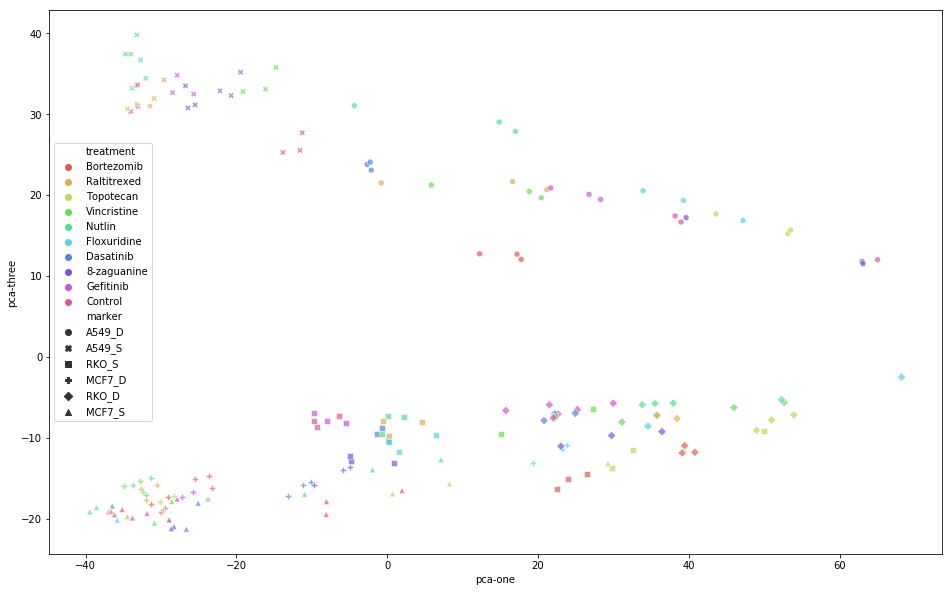

In [40]:
plt.figure(figsize=(16,10))
#markers = {'A549':"s", 'MCF7':"X", 'RKO':"o"}
ax = sns.scatterplot(x="pca-one", y="pca-three", 
                     style="marker",
                     hue = "treatment",
                     palette=sns.color_palette("hls", len(np.unique(data.target_drug))),
                     legend="full",
                     alpha=0.7,
                     #markers=markers,
                     data=data.loc[rndperm,:])

## PC2 vs PC3

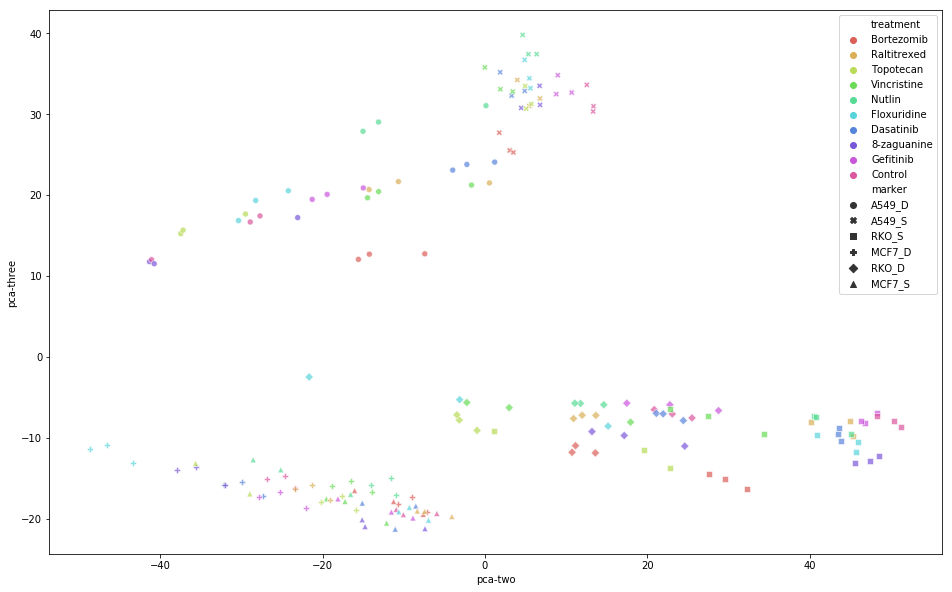

In [41]:
plt.figure(figsize=(16,10))
#markers = {'A549':"s", 'MCF7':"X", 'RKO':"o"}
ax = sns.scatterplot(x="pca-two", y="pca-three", 
                     style="marker",
                     hue = "treatment",
                     palette=sns.color_palette("hls", len(np.unique(data.target_drug))),
                     legend="full",
                     alpha=0.7,
                     #markers=markers,
                     data=data.loc[rndperm,:])

**PCA**
Check the results plot 2020-10-03 for drawn seperations.

**P1 vs PC2**
PC1 seem to seperate between state.
PC2 seem to seperate between cell_lines.

**PC1 vs PC3**
PC1 seem to seperate between state for A549 and RKO.
PC3 seem to seperate between state for MCF7 and group A549 from (RKO and MCF7).

**PC2 vs PC3**
PC2 seem to seperate between state for A549.
PC3 seem to seperate between cell_lines, and states for RKO.

Conclusion: PC1 seems to seperate the majority of the state, PC2 seem to seperate cell lines. PC3 holds additional information for cell line and state seperation.


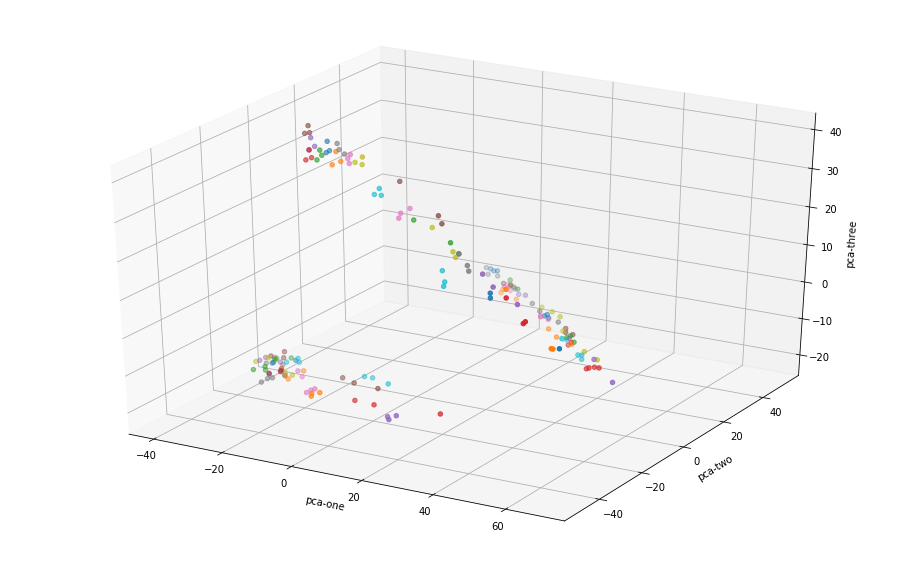

In [23]:
# PCA plot 3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=data.loc[rndperm,:]["pca-one"], 
    ys=data.loc[rndperm,:]["pca-two"], 
    zs=data.loc[rndperm,:]["pca-three"], 
    c=data.loc[rndperm,:]["target_drug"], 
    cmap='tab10',
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()


In the PCA exploration we can see that all cell lines have clear seperation.

RKO - has clear S and D seperation. MCF7 - S and D seperation is not very clear. A549 - has clear S and D seperation.


In [25]:
x = data.loc[rndperm,:]["pca-one"]
y = data.loc[rndperm,:]["pca-two"]
z = data.loc[rndperm,:]["pca-three"]

df_3d = pd.DataFrame()
df_3d['pc1'] = x
df_3d['pc2'] = y
df_3d['pc3'] = z
df_3d["treatment"] = data.treatment
df_3d["cell_line"] = data.marker


/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


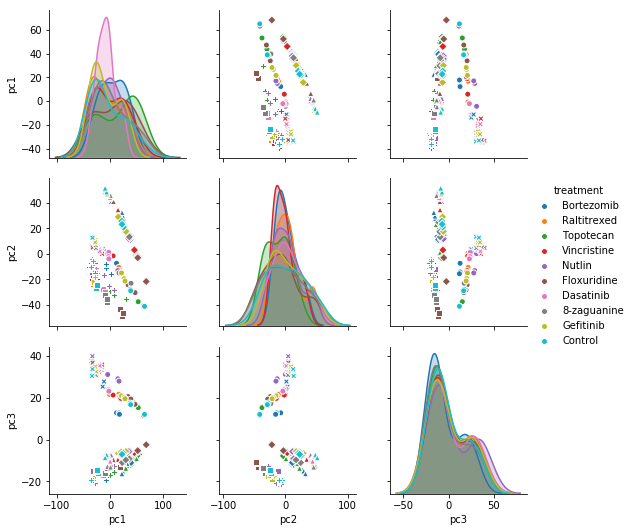

In [26]:

sns.pairplot(df_3d, hue = "treatment",
             plot_kws=dict(style = data.marker, linewidth=1))

/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


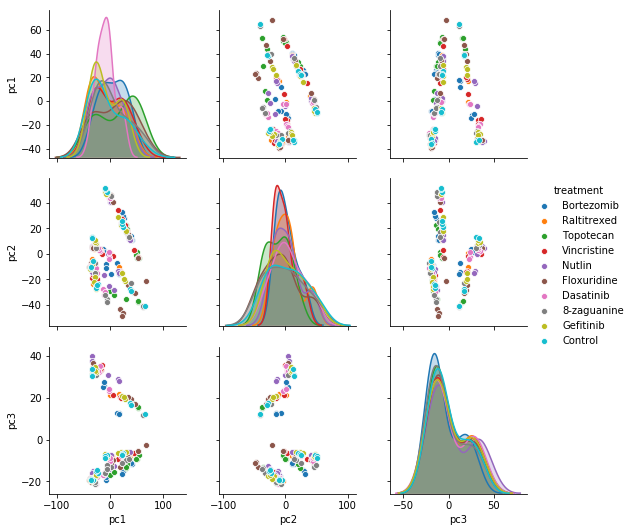

In [37]:

sns.pairplot(df_3d, hue = "treatment")


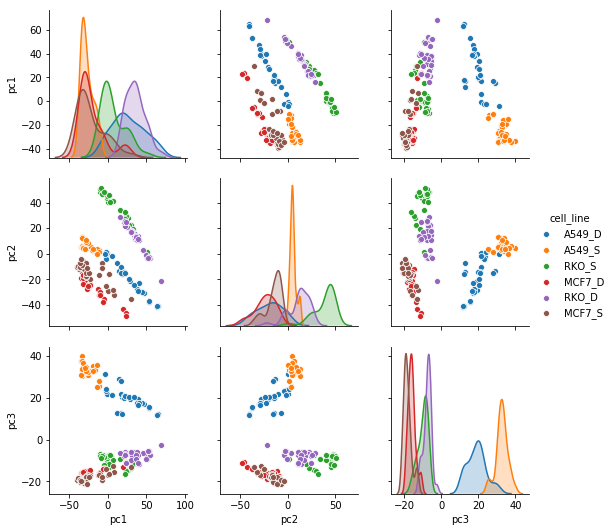

In [38]:
sns.pairplot(df_3d, hue = "cell_line")


#PCA Component seperation

PC1 seperates the D/S for A549 and RKO
PC2 seperates the D/S for MCF7
PC3 ? 



# t-SNE


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 180 samples in 0.002s...
[t-SNE] Computed neighbors for 180 samples in 0.048s...
[t-SNE] Computed conditional probabilities for sample 180 / 180
[t-SNE] Mean sigma: 30.569735


/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/neighbors/base.py:326: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.151875
[t-SNE] KL divergence after 300 iterations: 0.164701
t-SNE done! Time elapsed: 0.38671445846557617 seconds


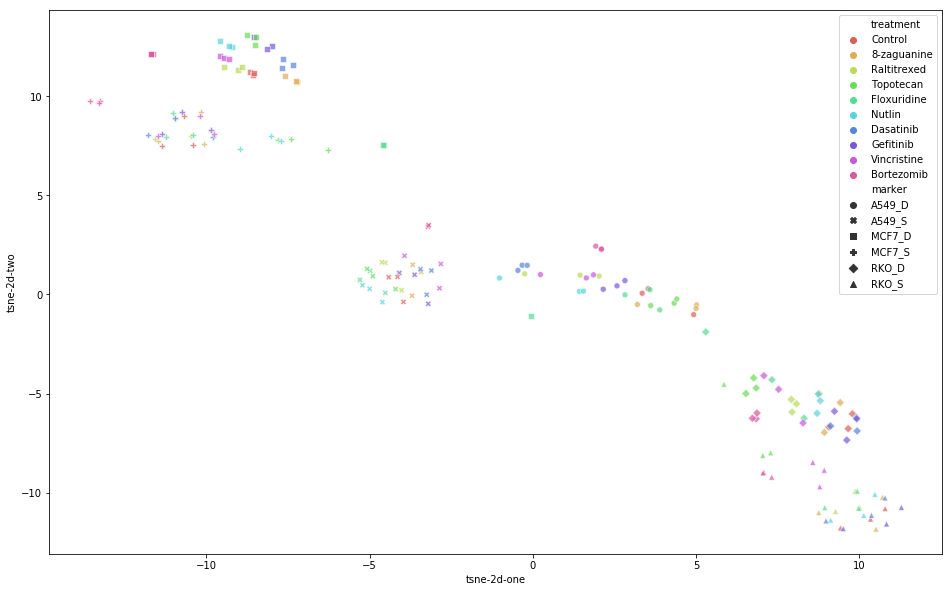

In [29]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_vals)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]

# t-SNE plot 2D
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    style="marker",
    hue="treatment",
    palette=sns.color_palette("hls", len(np.unique(data.target_drug))),
    data=data,
    legend="full",
    alpha=0.7
)

t-SNE results:

Clear cell lines seperation and state.

**A549_S**

Seperation of treatment, although not very clear.

**A549_D**

No clear seperation of treatments.

**MCF7_S**

No clear seperation of treatment.

**MCF7_D**

Very clear seperation of treatments.

**RKO_S**

Certain seperation of treatments.

**RKO_D**

Certain seperation of treatments.


# t-SNE on PCA components. 

In [30]:
np.random.seed(42)
rndperm = np.random.permutation(data.shape[0])
data_vals = data_vals.reset_index().drop("index", axis = 1)
data = data.reset_index().drop("index", axis = 1)


pca = PCA(n_components=50)
pca_result = pca.fit_transform(data_vals)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.33340555 0.22626289 0.14665547 0.06954847 0.03658033 0.02520553
 0.01581339 0.01487994 0.00956487 0.00895578 0.00769438 0.00729613
 0.00703898 0.00613293 0.0055998  0.00497699 0.00461122 0.004578
 0.00416893 0.00405166 0.00386298 0.00360112 0.00347438 0.00312317
 0.00307495 0.00301285 0.00272854 0.0023406  0.00225673 0.00199594
 0.00185462 0.00162908 0.00150982 0.001302   0.00121675 0.00111772
 0.00102824 0.0009743  0.00085826 0.00080921 0.00078489 0.00071059
 0.00069013 0.00065472 0.00060611 0.00058211 0.00052968 0.00049907
 0.00048278 0.00042932]


In [31]:
print("Variance explained by PC:s " + str(np.sum(pca.explained_variance_ratio_)))

Variance explained by PC:s 0.990761899215953


In [32]:
pca_result = pd.DataFrame(pca_result)

In [53]:
#pca_result

In [34]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 180 samples in 0.000s...
[t-SNE] Computed neighbors for 180 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 180 / 180
[t-SNE] Mean sigma: 30.578519


/home/ptruong/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/neighbors/base.py:326: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.594532
[t-SNE] KL divergence after 300 iterations: 0.145858
t-SNE done! Time elapsed: 0.3335728645324707 seconds


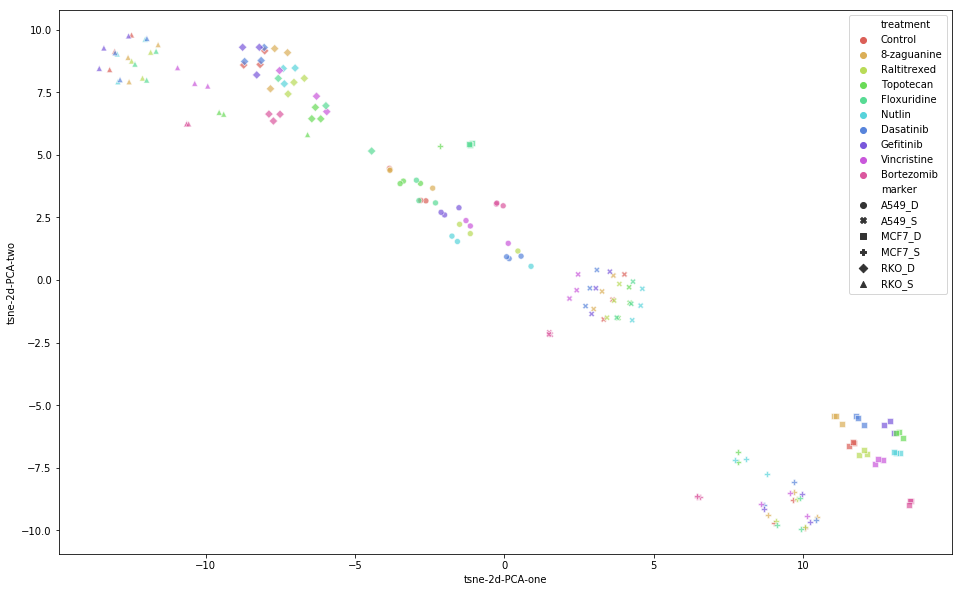

In [35]:
data['tsne-2d-PCA-one'] = tsne_results[:,0]
data['tsne-2d-PCA-two'] = tsne_results[:,1]

# t-SNE plot 2D
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-PCA-one", y="tsne-2d-PCA-two",
    style="marker",
    hue="treatment",
    palette=sns.color_palette("hls", len(np.unique(data.target_drug))),
    data=data,
    legend="full",
    alpha=0.7
)

t-SNE with PCA results:

Clear cell lines seperation and state.

**A549_S**

Seperation of treatment, although not very clear.

**A549_D**

No clear seperation of treatments.

**MCF7_S**

No clear seperation of treatment.

**MCF7_D**

Very clear seperation of treatments.

**RKO_S**

Certain seperation of treatments.

**RKO_D**

Certain seperation of treatments.

NOTE: Results are same as t-SNE without PCA.

# Principal Component Analysis (PCA)
The PCA is a statstical method that uses an orthogonal transformation to convert a set of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables. The transformation is done in such a way that the first principal component captures tha largest possible variance, and each succeeding component in turn captures the largest variance possible under the contraint that it is orthogonal (or uncorrelated) with the preceding components. PCA is sensitive to the relative scaling of the original variables, therefor data used with the PCA needs to be normalized.

# Independent Component Analysis (ICA) 
The ICA is a statistical method to find the hidden factors (or latent variables) that yields a set of random variables, measures or signals. The ICA assumes data is multivariate and defines a generative model for the observed data. By the multivariate assumption it is understood that the observed data is a linear mixture of some unknown latent variable, where the latent variables are assumed non-gaussian and mutually independent. The latent variables are the independent components (often called sources or factors found by ICA) of the observed data. The method is often able to identify underlying factors where FA and PCA fail. The ICA is commonly used in signals processing since it aims to capture the underlying independent components of the data. 

# ICA vs PCA
Both PCA and ICA are dimensionality reduction methods to find a set of vectors for the data, that are a linear combination of the basis. In PCA the basis are the vectors that best captures the variance of the data. In ICA the basis are vectors that are independent component of the data. Imagine that the data is a mix of signals and then the ICA basis will have vectors for each independent signal, while the PCA components will capture the variance in descending order, where the components are orthogonal (i.e. uncorrelated).

In a practical sense, the PCA could be used to find a reduced-rank representation of the data and the ICA could be used to find a representation of the data as independent sub-elements. In other words, the PCA attempts to compress the data and the ICA attempts to seperate the data. 



# ICA

In [45]:
from sklearn.decomposition import FastICA

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(data_vals.T)  # Reconstruct signals
ica_result = ica.mixing_  # Get estimated mixing matrix

data['ica-one'] = ica_result[:,0]
data['ica-two'] = ica_result[:,1] 
data['ica-three'] = ica_result[:,2]


## IC1 vs IC2

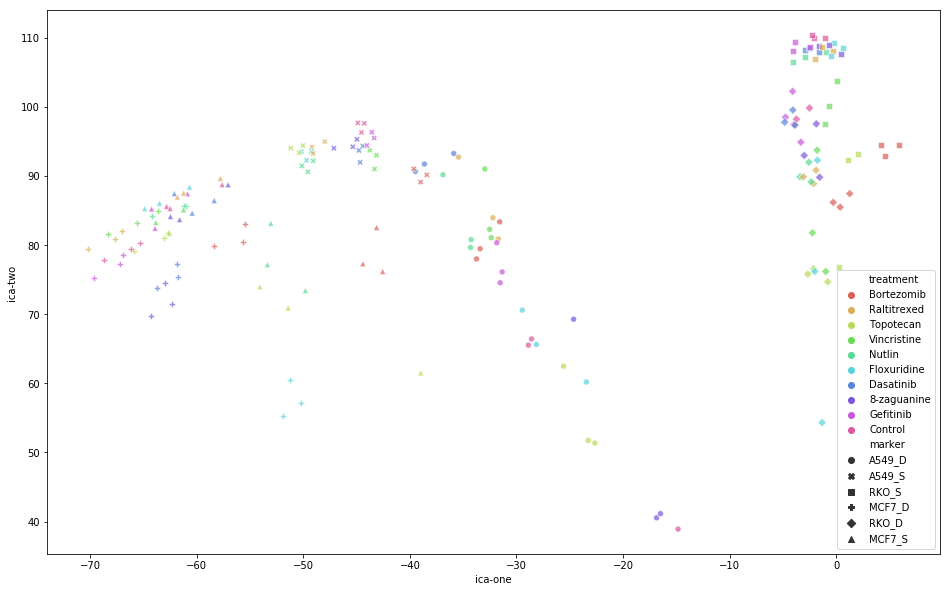

In [46]:
# ICA plot 2D
plt.figure(figsize=(16,10))
#markers = {'A549':"s", 'MCF7':"X", 'RKO':"o"}
ax = sns.scatterplot(x="ica-one", y="ica-two", 
                     style="marker",
                     hue = "treatment",
                     palette=sns.color_palette("hls", len(np.unique(data.target_drug))),
                     legend="full",
                     alpha=0.7,
                     #markers=markers,
                     data=data.loc[rndperm,:])


## IC1 vs IC3

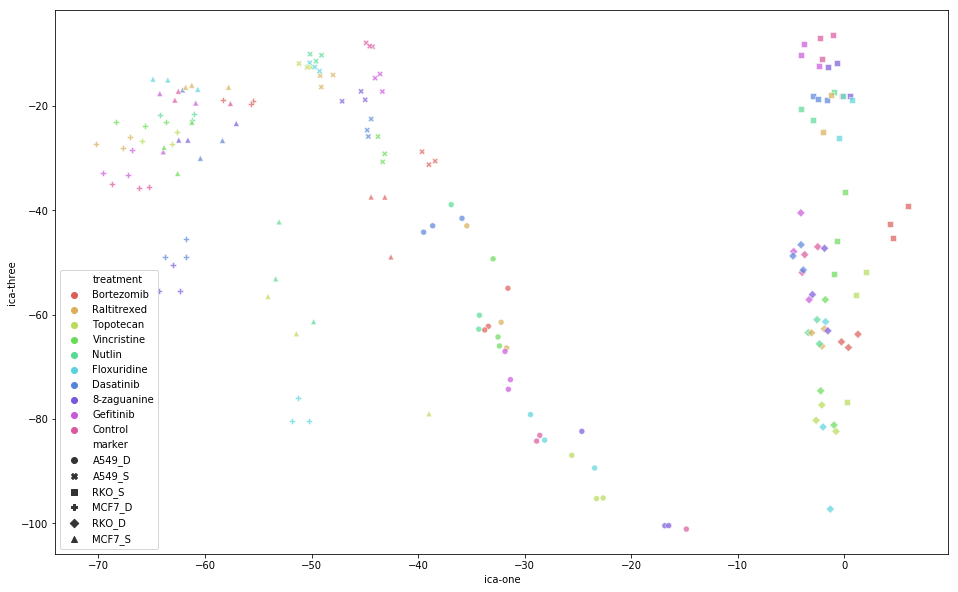

In [51]:
#markers = {'A549':"s", 'MCF7':"X", 'RKO':"o"}
plt.figure(figsize=(16,10))
ax = sns.scatterplot(x="ica-one", y="ica-three", 
                     style="marker",
                     hue = "treatment",
                     palette=sns.color_palette("hls", len(np.unique(data.target_drug))),
                     legend="full",
                     alpha=0.7,
                     #markers=markers,
                     data=data.loc[rndperm,:])


## IC2 vs IC3

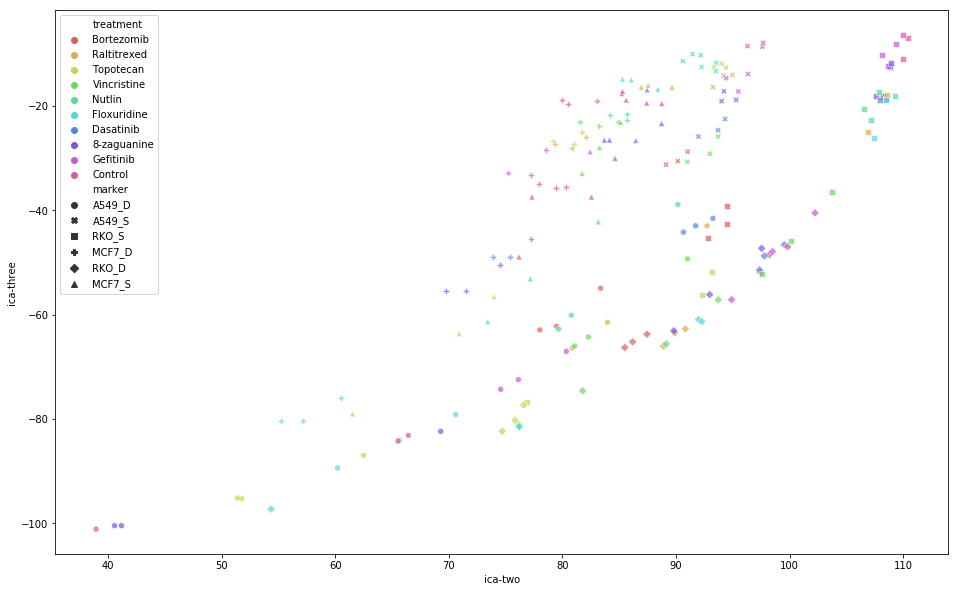

In [52]:
#markers = {'A549':"s", 'MCF7':"X", 'RKO':"o"}
plt.figure(figsize=(16,10))
ax = sns.scatterplot(x="ica-two", y="ica-three", 
                     style="marker",
                     hue = "treatment",
                     palette=sns.color_palette("hls", len(np.unique(data.target_drug))),
                     legend="full",
                     alpha=0.7,
                     #markers=markers,
                     data=data.loc[rndperm,:])


**ICA Check the results plot 2020-10-03 for drawn seperations.**

**IC1 vs IC2**
IC2 seperates both cell lines and states.


**IC1 vs IC3**
IC1 combined with IC3 seperated cell lines and states.

**IC2 vs IC3**
Why does IC2 not seperate anything here?
